In [2]:
import pandas as pd

WINTER_CSV_PATH = r"C:\Users\TalPNB22\OneDrive\Documents\University\Master\Ships\routes expirements from noa\winter_data_fixed_lived.csv"

df = pd.read_csv(WINTER_CSV_PATH)
df['dying_day'] = df['dying_day'].astype(pd.Int64Dtype())
df.head()

,Season,Name,Replicate,Place,Sampling Date,Body Size (cm),Temp 0,Temp 1,Temp 2,Temp 3,...,Lived 34,Lived 35,Lived 36,Lived 37,Lived 38,Lived 39,Lived 40,Lived 41,Lived 42,dying_day
0,winter,PISCES,a,Ashdod,21.3.24,4.0,22,9,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,winter,PISCES,b,Ashdod,21.3.24,9.0,22,9,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,winter,PISCES,c,Ashdod,21.3.24,5.0,22,9,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,winter,ELPIDA,a,Ashdod,21.3.24,7.5,22,9,9.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,winter,ELPIDA,b,Ashdod,21.3.24,8.0,22,9,9.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


C:\Users\TalPNB22\AppData\Local\Temp\ipykernel_17616\348191496.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probability = temperature_lived_df.groupby('Temp_Bin')['Lived_Value'].mean().reset_index()
C:\Users\TalPNB22\AppData\Local\Temp\ipykernel_17616\348191496.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Temp_Bin', y='Probability', data=probability, palette='viridis')


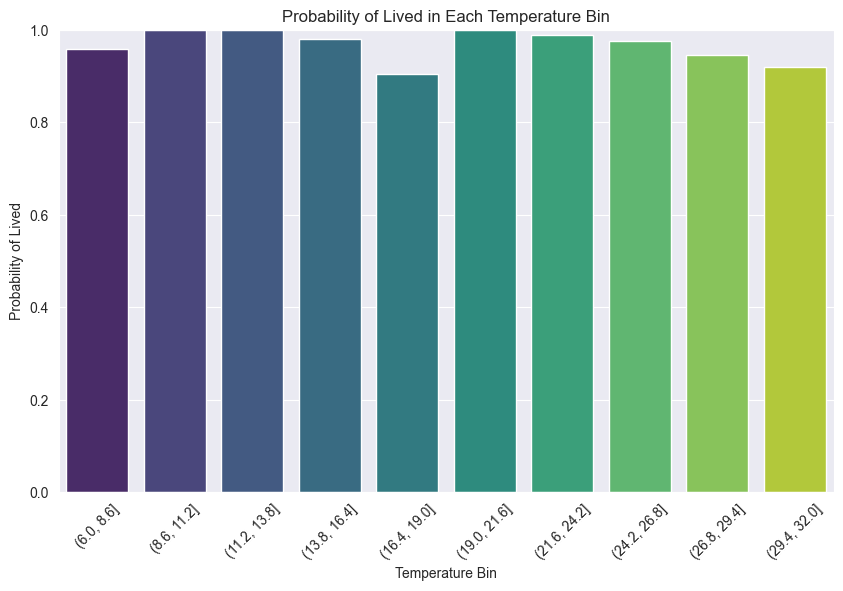

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Identify columns matching the pattern "Lived {n}"
lived_columns = [col for col in df.columns if 'Lived' in col]
temperature_columns = [col for col in df.columns if 'Temp' in col]
salinity_columns = [col for col in df.columns if 'Salinity' in col]

lived_df = df.melt(value_vars=lived_columns, var_name='Lived', value_name='Lived_Value')
temperature_df = df.melt(value_vars=temperature_columns, var_name='Temperature', value_name='Temperature_Value')
salinity_df = df.melt(value_vars=salinity_columns, var_name='Salinity', value_name='Salinity_Value')

lived_df['id'] = lived_df.index
temperature_df['id'] = temperature_df.index
salinity_df['id'] = salinity_df.index

temperature_lived_df = pd.merge(temperature_df, lived_df, on='id')
temperature_lived_df = temperature_lived_df[['Temperature_Value', 'Lived_Value']]

salinity_lived_df = pd.merge(salinity_df, lived_df, on='id')
salinity_lived_df = salinity_lived_df[['Salinity_Value', 'Lived_Value']]

num_bins = 10
# temperature_lived_df['Temp_Bin'] = pd.qcut(temperature_lived_df['Temperature_Value'], q=num_bins)
# temperature_lived_df['Temp_Bin'] = pd.cut(temperature_lived_df['Temperature_Value'], bins=num_bins)
temperature_lived_df['Temp_Bin'] = pd.cut(temperature_lived_df['Temperature_Value'],
                                          bins=np.linspace(temperature_lived_df['Temperature_Value'].min(),
                                                           temperature_lived_df['Temperature_Value'].max(),
                                                           num_bins + 1)
                                          )
probability = temperature_lived_df.groupby('Temp_Bin')['Lived_Value'].mean().reset_index()
probability.columns = ['Temp_Bin', 'Probability']

plt.figure(figsize=(10, 6))
sns.barplot(x='Temp_Bin', y='Probability', data=probability, palette='viridis')
plt.title('Probability of Lived in Each Temperature Bin')
plt.xlabel('Temperature Bin')
plt.ylabel('Probability of Lived')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Creating a simplified plot
plt.figure(figsize=(15, 10))
lived_columns = sorted([col for col in df.columns if 'Lived' in col], key=lambda x: int(x.split()[1]))
temperature_columns = sorted([col for col in df.columns if 'Temp' in col], key=lambda x: int(x.split()[1]))

# Iterating through a subset of the data to plot timelines
for idx, (index, row) in enumerate(df.iterrows()):
    survival = row[lived_columns].values
    temperature = row[temperature_columns].values
    days = range(len(survival))

    plt.plot(days, temperature, color='gray', alpha=0.3)  # Plot temperature line

    alive_days = [day for day, status in zip(days, survival) if status == 1]
    dead_days = [day for day, status in zip(days, survival) if status == 0]

    alive_temps = [temp for temp, status in zip(temperature, survival) if status == 1]
    dead_temps = [temp for temp, status in zip(temperature, survival) if status == 0]

    plt.scatter(alive_days, alive_temps, color='green', alpha=0.7, label='Alive' if index == 0 else "")
    plt.scatter(dead_days, dead_temps, color='red', alpha=0.7, label='Dead' if index == 0 else "")

plt.title('Timeline of Animal Survival with Temperature')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()